# Задача 2.1

**[Выборка](data/2.1.csv)**.

Рассматривается задача тестирования вакцины от некоторого вируса. Производство вакцины очень дорогое и затратное по времени, поэтому **в день может быть произведена только одна ампула**.

**Требуется проверить**, что вакцина помогает: **вероятность заразиться меньше у человека с вакциной, чем у человека без вакцины**.

Эксперимент ставится следующим образом: каждый день участвуют два идентичных по здоровью человека. Один из людей принимает вакцину, а второй нет, после чего обоих ставят в одну среду с вирусом. В конце для проверяют, кто заразился. В таблице: $s — sick, h — healthy$.

Весь мир ждет вакцину от данного вируса, поэтому к руководству института постоянно приходят запросы о сроках завершения тестирования образца. Руководство поручило Вам **оценить среднее время, которое понадобится на тестирования данной вакцины, а также провести анализ полученных данных на уровне значимости $\alpha=0.05$ и при ошибке второго рода $\beta=0.2$**.

## Требуется:

1. Записать задачу формально.
2. Выполнить оценку среднего количества дней для принятия решения. Учесть, что истинная вероятность заразиться с вакциной и без равны $p_1 = 0.2, p_2 = 0.5$, соответственно.
3. Выполнить анализ данных и выяснить, работает ли вакцина или нет.

Все выкладки должны быть сделаны аналитически, без использования компьютера.

In [64]:
import pandas as pd

data = pd.read_csv("data/2.1.csv")
data

,with vaccine,without vaccine
0,h,h
1,h,s
2,h,s
3,h,h
4,h,h
5,h,s
6,h,h
7,h,s
8,h,s
9,h,s


In [65]:
data.describe()

,with vaccine,without vaccine
count,30,30
unique,2,2
top,h,s
freq,25,16


Преобразуем данные для удобного дальнейшего использования: $h == 1, s == 0$.

In [66]:
values = (data.values == 'h').astype(int)
values

array([[1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0]])

Вероятность заразиться меньше у человека с вакциной, чем у человека без вакцины $\leftrightarrow \forall i: data[i][0] > data[i][1]$:

In [67]:
deltas = (values[:, 0] > values[:, 1])
deltas

array([False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True, False, False])

- $p_1$ - нижняя граница
- $p_2$ - верхняя граница
- $\alpha$ - уровень значимости, допускаемая вероятность ошибки первого рода: отвергнуть верную $H_0$ (при $p \le p_L$)
- $\beta$ - допускаемая вероятность ошибки второго рода: принять неверную $H_0$ (при $p \ge p_U$)

Decision:	Continue

    values  lower   upper
n                        
21      10  5.996   9.120
22      10  6.335   9.459
23      10  6.674   9.798
24      10  7.013  10.137
25      10  7.352  10.476
26      11  7.691  10.815
27      11  8.030  11.154
28      12  8.369  11.493
29      12  8.708  11.832
30      12  9.047  12.171


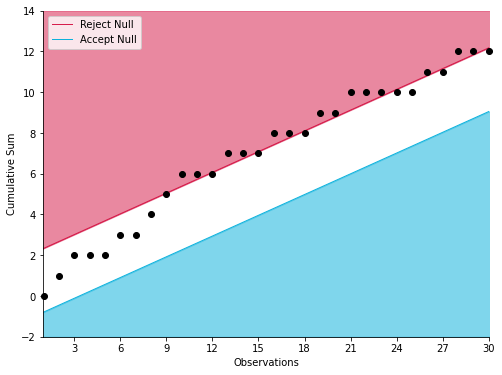

In [68]:
import sprt

alpha = 0.05
beta = 0.2
p1 = 0.2
p2 = 0.5
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=p1, h1=p2, values=deltas)
test.plot()

## Какое минимальное количество итераций требуется для вынесения решения по данной гипотезе?

Decision:	Reject

    values  lower  upper
n                       
1        0 -0.785  2.339
2        1 -0.446  2.678
3        2 -0.107  3.017
4        2  0.232  3.356
5        2  0.571  3.695
6        3  0.910  4.034
7        3  1.249  4.373
8        4  1.588  4.712
9        5  1.927  5.051
10       6  2.266  5.390


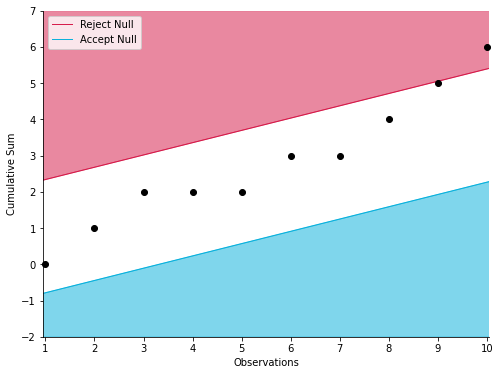

In [70]:
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=p1, h1=p2, values=deltas[:10])
test.plot()

То есть потребуется **10** дней для тестирования образца $\rightarrow$ вакцина работает.

## Матожидание требуемого количества итераций

Стоит ли тут округлять тоже **вниз**, как в домашке???

In [71]:
import numpy as np
import scipy
import scipy.stats as st

def expectation(p, p_0, alpha, beta, h):
    A = (1 - beta)/alpha
    B = beta/(1 - alpha)
    L = (A**h - 1)/(A**h - B**h)
    
    result = (L * np.log(B) + (1 - L) * np.log(A))/ (p * np.log(p/p_0) + (1 - p) * np.log((1 - p)/(1 - p_0)) )
    
    return result


def f(x):
    s = (1 - ((1 - p2)/(1 - p1))**x)/((p2/p1)**x - ((1 - p2)/(1 - p1))**x ) - p2
    return s

solution = scipy.optimize.root_scalar(f, bracket=[-10, 10], method='brentq')
print(solution)

print('\n Математическое ожидание числа итераций:', int(expectation(p2, p1, alpha, beta, solution.root)))

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -1.0

 Математическое ожидание числа итераций: 8
